In [29]:
# Project 4: COVID-19 Data Analysis
# Problem Statement: Understanding COVID-19 trends helps in planning public health policies.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/4_COVID 19.csv")

In [32]:
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [33]:
df.shape

(72090, 8)

In [34]:
df.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,72090.000000,72090.000000,7.209000e+04,6.831000e+04,72090.000000
mean,20.961559,23.343773,4.284619e+04,2.760750e+04,1610.020807
std,24.882193,70.429778,3.257632e+05,2.119790e+05,10272.269230
min,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.428055,-15.310100,1.600000e+01,3.000000e+00,0.000000
50%,22.300000,20.939400,4.400000e+02,2.020000e+02,6.000000
75%,41.153300,80.771797,4.688750e+03,2.150000e+03,89.000000
max,71.706900,178.065000,8.106384e+06,6.524595e+06,219286.000000


In [35]:
df.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72090 non-null  object 
 1   Country/Region  72090 non-null  object 
 2   Province/State  21870 non-null  object 
 3   Lat             72090 non-null  float64
 4   Long            72090 non-null  float64
 5   Confirmed       72090 non-null  int64  
 6   Recovered       68310 non-null  float64
 7   Deaths          72090 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB


In [37]:
# check for missing values
df.isnull().sum()

Date                  0
Country/Region        0
Province/State    50220
Lat                   0
Long                  0
Confirmed             0
Recovered          3780
Deaths                0
dtype: int64

In [38]:
# drop the columns if not needed 
df = df.drop(columns=["Province/State", "Lat", "Long"])

In [39]:
# If missing values in Recovered mean 'no recovered cases reported' then replace them with 0

df['Recovered'] = df['Recovered'].fillna(0).astype(int)
print(df[['Date', 'Recovered']].head())

         Date  Recovered
0  2020-01-22          0
1  2020-01-23          0
2  2020-01-24          0
3  2020-01-25          0
4  2020-01-26          0


In [40]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64

In [41]:
# Convert Date column to datetime format and adding a new column Year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
print(df[['Date', 'Year']].head())

        Date  Year
0 2020-01-22  2020
1 2020-01-23  2020
2 2020-01-24  2020
3 2020-01-25  2020
4 2020-01-26  2020


In [42]:
df.head()

,Date,Country/Region,Confirmed,Recovered,Deaths,Year
0,2020-01-22,Afghanistan,0,0,0,2020
1,2020-01-23,Afghanistan,0,0,0,2020
2,2020-01-24,Afghanistan,0,0,0,2020
3,2020-01-25,Afghanistan,0,0,0,2020
4,2020-01-26,Afghanistan,0,0,0,2020


In [43]:
# Count how many entries are there per year
year_counts = df['Year'].value_counts().sort_index()
print("Entries per year:", year_counts)

Entries per year: Year
2020    72090
Name: count, dtype: int64


In [44]:
# check for other year entries

if 2021 in df['Year'].values:
    print("Entries found for the year 2021.")
    print("Number of 2021 entries:", df[df['Year'] == 2021].shape[0])
else:
    print("No entries found for the year 2021.")

No entries found for the year 2021.


In [45]:
# Aggregate data by Date and Country/Region
aggregated_data = df.groupby(["Date", "Country/Region"]).sum().reset_index()

In [46]:
aggregated_data

,Date,Country/Region,Confirmed,Recovered,Deaths,Year
0,2020-01-22,Afghanistan,0,0,0,2020
1,2020-01-22,Albania,0,0,0,2020
2,2020-01-22,Algeria,0,0,0,2020
3,2020-01-22,Andorra,0,0,0,2020
4,2020-01-22,Angola,0,0,0,2020
...,...,...,...,...,...,...
51025,2020-10-17,West Bank and Gaza,46746,40162,402,2020
51026,2020-10-17,Western Sahara,10,8,1,2020
51027,2020-10-17,Yemen,2055,1336,596,2020
51028,2020-10-17,Zambia,15789,14927,346,2020


In [47]:
# Global Trends Visualization
global_data = aggregated_data.groupby("Date")[["Confirmed", "Recovered", "Deaths"]].sum()
global_data

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-10-13,38130527,26305933,1086146
2020-10-14,38511143,26516041,1092149
2020-10-15,38917803,26721132,1098254


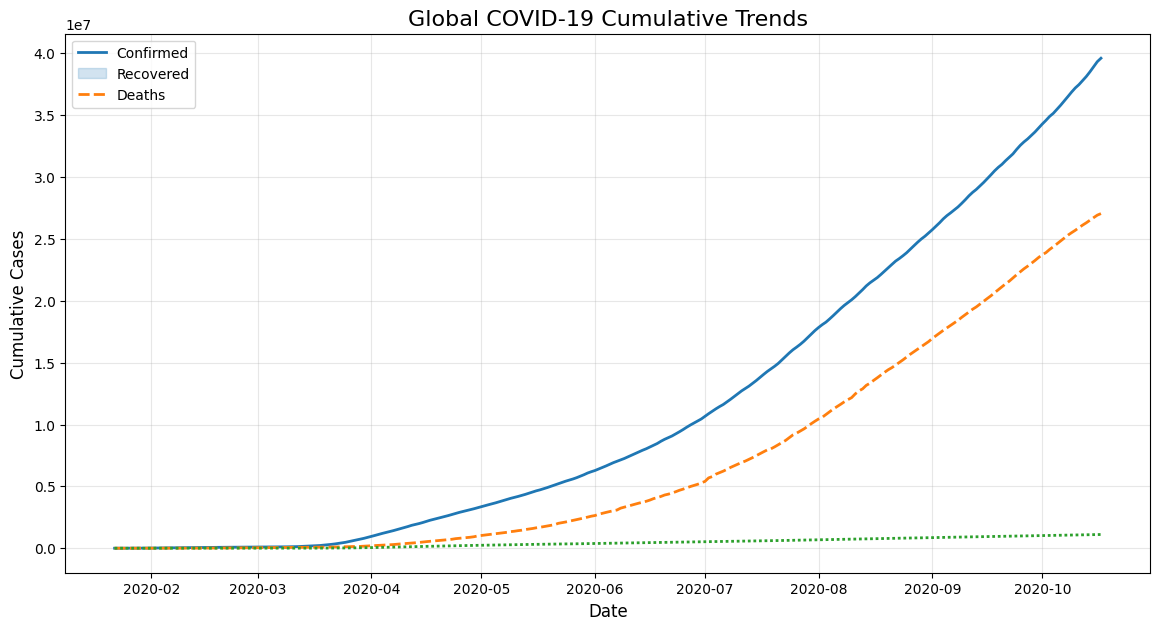

In [48]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_data, linewidth=2)
plt.title("Global COVID-19 Cumulative Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Cases", fontsize=12)
plt.legend(["Confirmed", "Recovered", "Deaths"], fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [49]:
# Area Chart (Proportions of Cases)
global_data['Active'] = global_data['Confirmed'] - global_data['Recovered'] - global_data['Deaths']
global_data['Active']

Date
2020-01-22         510
2020-01-23         606
2020-01-24         879
2020-01-25        1353
2020-01-26        2010
                ...   
2020-10-13    10738448
2020-10-14    10902953
2020-10-15    11098417
2020-10-16    11301159
2020-10-17    11450503
Name: Active, Length: 270, dtype: int64

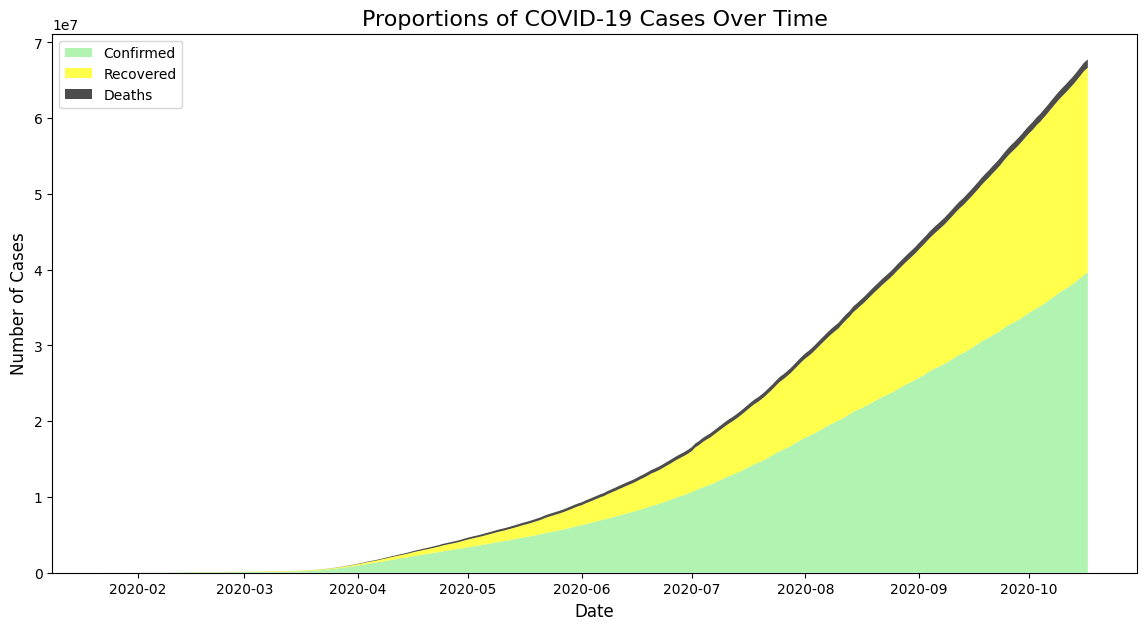

In [50]:
plt.figure(figsize=(14, 7))
plt.stackplot(global_data.index, global_data['Confirmed'], global_data['Recovered'], global_data['Deaths'],
              labels=['Confirmed', 'Recovered', 'Deaths'], alpha=0.7, colors=['lightgreen', "yellow", "black"])
plt.title('Proportions of COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [51]:
# Heatmap (Country-Wise Comparison)
pivot_data = aggregated_data.pivot(index="Date", columns="Country/Region", values="Confirmed").fillna(0)
pivot_data

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-13,39928,15752,53399,2995,6680,111,917035,57566,27337,57326,...,637708,2337,61642,84391,1113,45200,10,2053,15587,8036
2020-10-14,39994,15955,53584,3190,6846,112,931967,58624,27357,58672,...,657459,2388,61950,85005,1122,45658,10,2053,15616,8055
2020-10-15,40026,16212,53777,3190,7096,112,949063,59995,27371,60224,...,676455,2417,62278,85469,1124,46100,10,2053,15659,8075


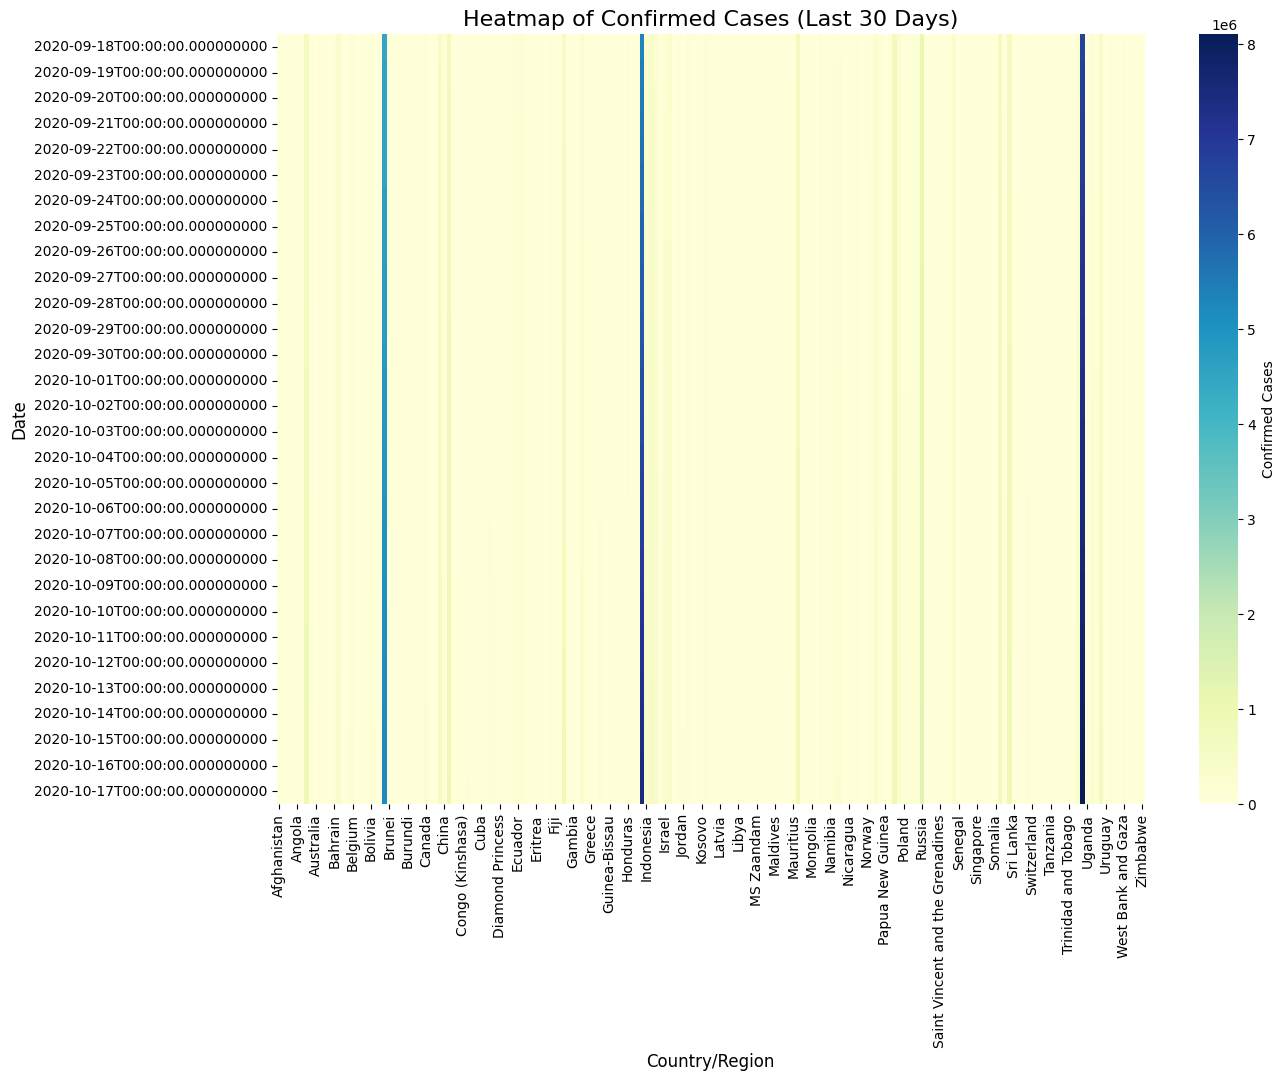

In [52]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data.iloc[-30:, :], cmap="YlGnBu", cbar_kws={'label': 'Confirmed Cases'})
plt.title("Heatmap of Confirmed Cases (Last 30 Days)", fontsize=16)
plt.xlabel("Country/Region", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.show()

In [53]:
# Total count for Confirmed, Recovered, and Deaths 
total_counts = global_data.iloc[-1]  
total_counts

Confirmed    39608809
Recovered    27049506
Deaths        1108800
Active       11450503
Name: 2020-10-17 00:00:00, dtype: int64

In [54]:
# Labels and values for the pie chart
labels = ['Confirmed', 'Recovered', 'Deaths']
values = [total_counts['Confirmed'], total_counts['Recovered'], total_counts['Deaths']]

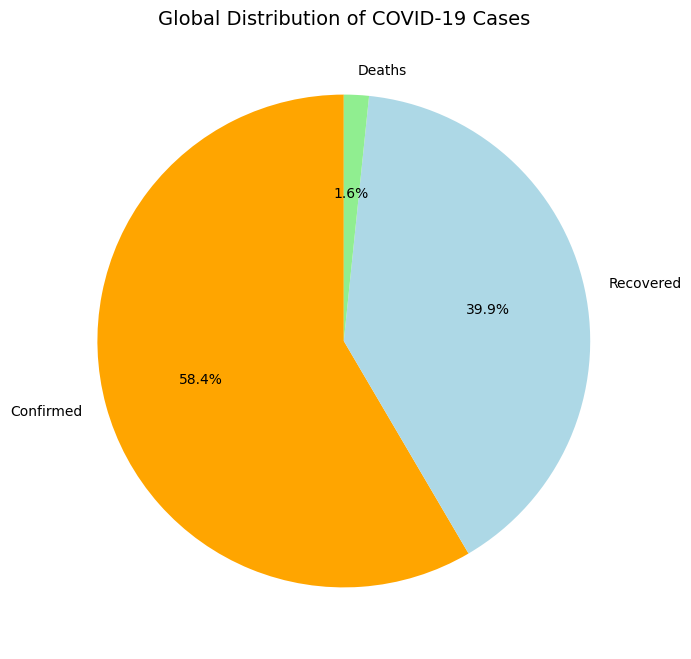

In [55]:
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue', 'lightgreen'])
plt.title("Global Distribution of COVID-19 Cases", fontsize=14)
plt.show()

In [57]:
df.to_csv('E:/AICTE Intern Tasks/RISE/Datasets/4_Covid19_Cleaned.csv', index=False)